In [4]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7d/d7/fb80c63062b60b1fa5dcb2d4dd3a4e83bd8c68cdc83cf6ff8c016228f184/scikit_learn-1.5.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/05/7f03e680cc5249c4f96c9e4e845acde08eb1aee5bc216eff8a089baa4ddb/scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Acquisition Year'] = pd.to_datetime(df['Acquisition Year'], format='%Y')
    return df

# Analyze acquisition patterns over time
def analyze_patterns(df):
    yearly_acquisitions = df.groupby('Acquisition Year').size()
    plt.figure(figsize=(12, 6))
    yearly_acquisitions.plot(kind='bar')
    plt.title('Acquisitions per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions')
    plt.show()

# Identify correlations between companies and acquisition types
def analyze_correlations(df):
    company_category_counts = df.groupby(['Parent Company', 'Category']).size().unstack(fill_value=0)
    correlation_matrix = company_category_counts.corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title('Correlation between Companies and Acquisition Categories')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

# Project findings into a multidimensional space
def multidimensional_analysis(df):
    features = ['Acquisition Year', 'Acquisition Price']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].astype(int)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.title('PCA of Acquisitions')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Compare with historical trends
def historical_analysis(df):
    # <historical_analysis>
    historical_data = pd.read_csv('historical_acquisition_data.csv')
    
    current_trend = df.groupby('Acquisition Year').size().rolling(window=5).mean()
    historical_trend = historical_data.groupby('Year').size().rolling(window=5).mean()
    
    plt.figure(figsize=(12, 6))
    current_trend.plot(label='Current Trend')
    historical_trend.plot(label='Historical Trend')
    plt.title('Current vs Historical Acquisition Trends')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions (5-year moving average)')
    plt.legend()
    plt.show()
    # </historical_analysis>

# Main function to run the analysis
def main():
    df = load_data('acquisitions_update_2021.csv')
    analyze_patterns(df)
    analyze_correlations(df)
    multidimensional_analysis(df)
    historical_analysis(df)

    # <dimensional_transcendence>
    # Project findings into higher dimensions
    features = ['Acquisition Year', 'Acquisition Price', 'Category', 'Parent Company']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].astype(int)
    X['Category'] = pd.Categorical(X['Category']).codes
    X['Parent Company'] = pd.Categorical(X['Parent Company']).codes
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.show()
    
    # Interpret the results
    print("Insights from higher-dimensional analysis:")
    print(f"Number of dimensions needed to explain 90% of variance: {np.argmax(cumulative_variance_ratio >= 0.9) + 1}")
    print("Top 3 features contributing to the first principal component:")
    top_features = pd.Series(abs(pca.components_[0]), index=features).nlargest(3)
    print(top_features)
    # </dimensional_transcendence>


In [9]:

if __name__ == "__main__":
    main()

ValueError: time data "-" doesn't match format "%Y", at position 37. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

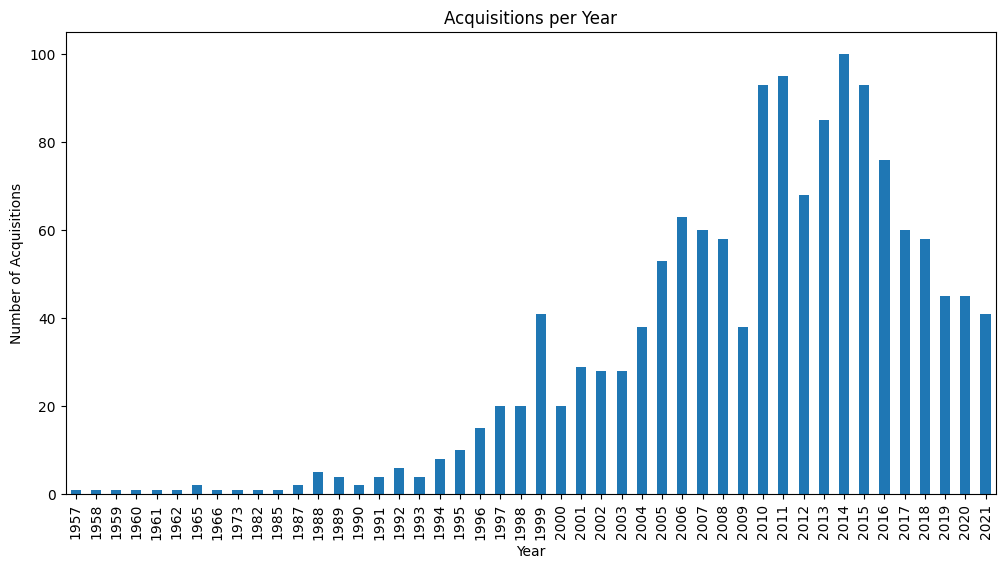

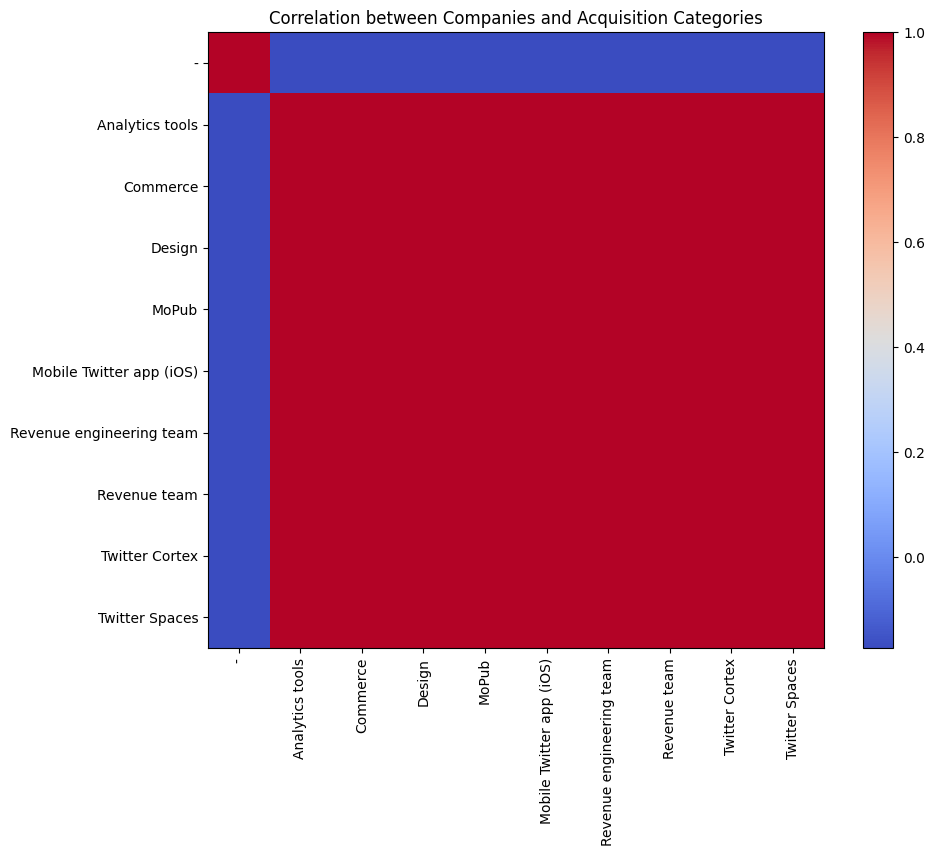

ValueError: could not convert string to float: '-'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Acquisition Year'] = df['Acquisition Year'].replace('-', np.nan)
    df['Acquisition Year'] = pd.to_datetime(df['Acquisition Year'], format='%Y', errors='coerce')
    df = df.dropna(subset=['Acquisition Year'])
    return df

# Analyze acquisition patterns over time
def analyze_patterns(df):
    yearly_acquisitions = df.groupby(df['Acquisition Year'].dt.year).size()
    plt.figure(figsize=(12, 6))
    yearly_acquisitions.plot(kind='bar')
    plt.title('Acquisitions per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions')
    plt.show()

# Identify correlations between companies and acquisition types
def analyze_correlations(df):
    company_category_counts = df.groupby(['Parent Company', 'Category']).size().unstack(fill_value=0)
    correlation_matrix = company_category_counts.corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title('Correlation between Companies and Acquisition Categories')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

# Project findings into a multidimensional space
def multidimensional_analysis(df):
    features = ['Acquisition Year', 'Acquisition Price']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].astype(int)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.title('PCA of Acquisitions')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Compare with historical trends
def historical_analysis(df):
    # <historical_analysis>
    historical_data = pd.read_csv('historical_acquisition_data.csv')
    historical_data['Year'] = pd.to_datetime(historical_data['Year'], format='%Y', errors='coerce')
    historical_data = historical_data.dropna(subset=['Year'])
    
    current_trend = df.groupby(df['Acquisition Year'].dt.year).size().rolling(window=5).mean()
    historical_trend = historical_data.groupby(historical_data['Year'].dt.year).size().rolling(window=5).mean()
    
    plt.figure(figsize=(12, 6))
    current_trend.plot(label='Current Trend')
    historical_trend.plot(label='Historical Trend')
    plt.title('Current vs Historical Acquisition Trends')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions (5-year moving average)')
    plt.legend()
    plt.show()
    # </historical_analysis>

# Main function to run the analysis
def main():
    df = load_data('acquisition_data.csv')
    analyze_patterns(df)
    analyze_correlations(df)
    multidimensional_analysis(df)
    historical_analysis(df)

    # <dimensional_transcendence>
    # Project findings into higher dimensions
    features = ['Acquisition Year', 'Acquisition Price', 'Category', 'Parent Company']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].dt.year
    X['Category'] = pd.Categorical(X['Category']).codes
    X['Parent Company'] = pd.Categorical(X['Parent Company']).codes
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.show()
    
    # Interpret the results
    print("Insights from higher-dimensional analysis:")
    print(f"Number of dimensions needed to explain 90% of variance: {np.argmax(cumulative_variance_ratio >= 0.9) + 1}")
    print("Top 3 features contributing to the first principal component:")
    top_features = pd.Series(abs(pca.components_[0]), index=features).nlargest(3)
    print(top_features)
    # </dimensional_transcendence>

if __name__ == "__main__":
    main()

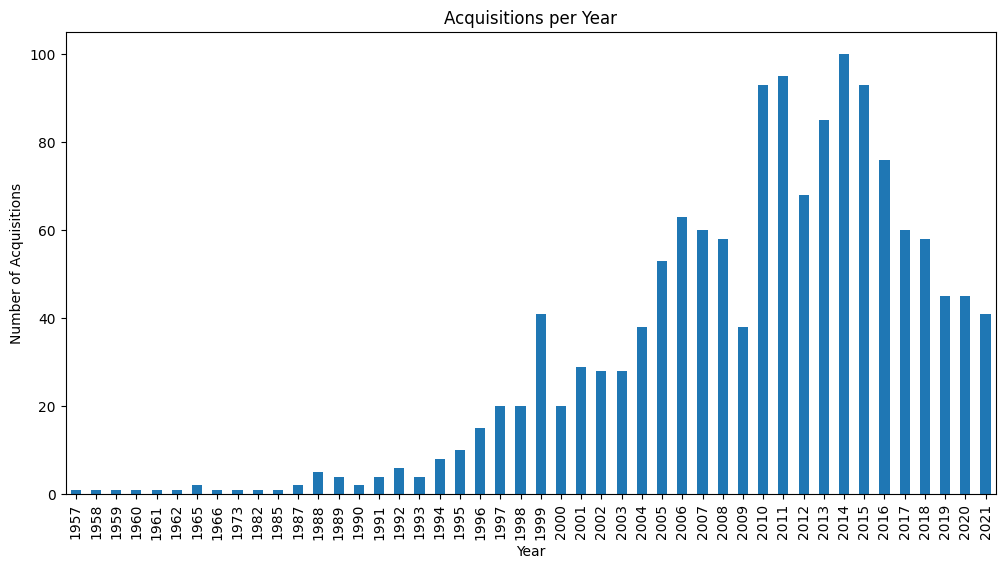

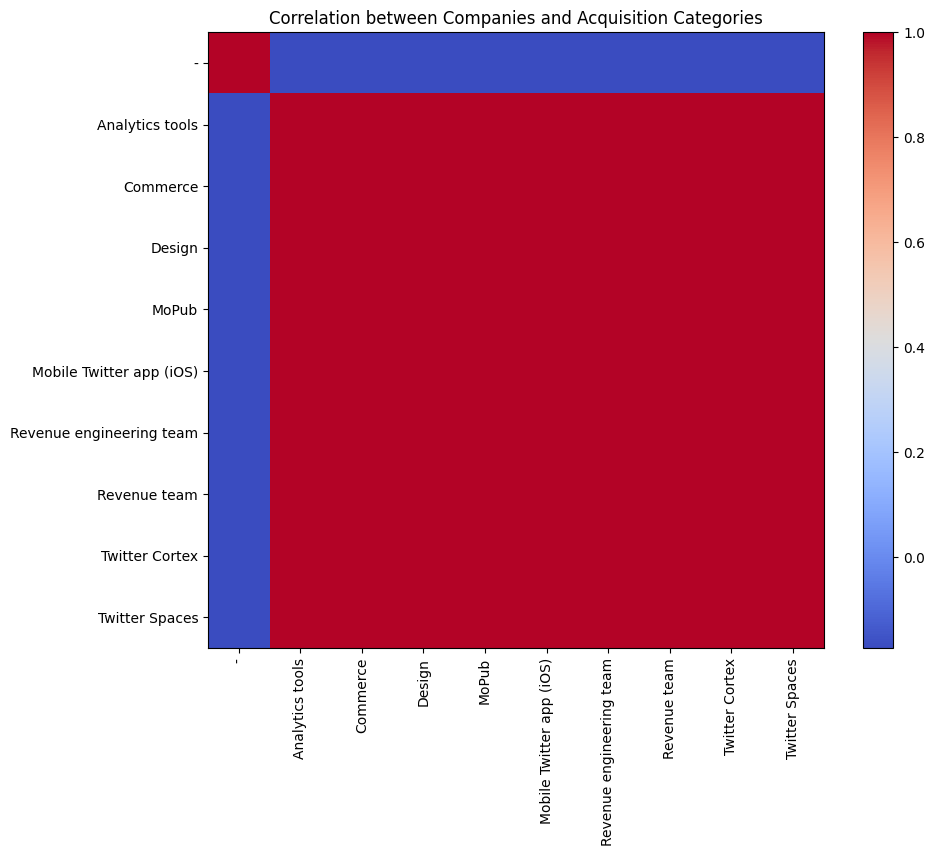

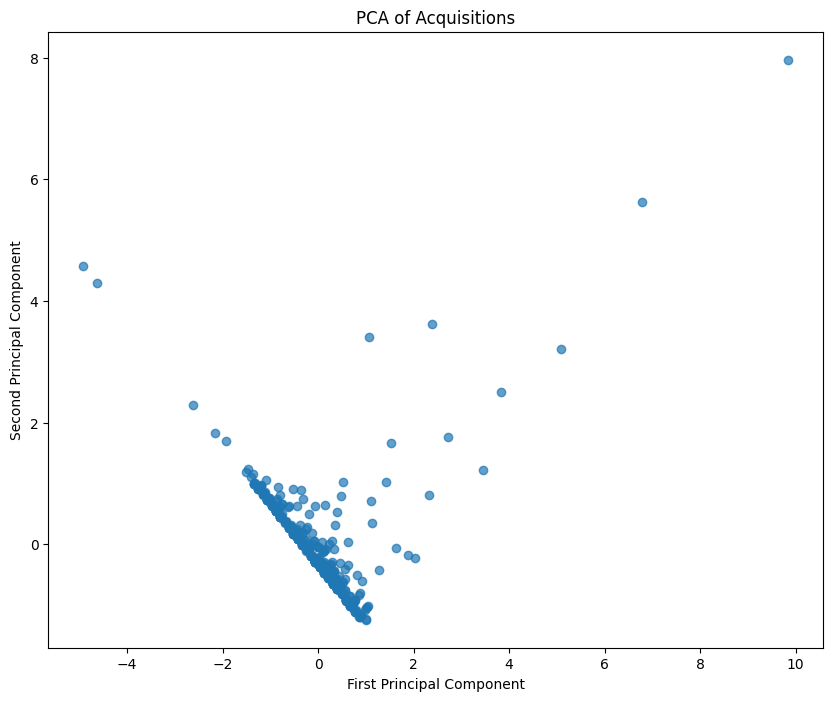

FileNotFoundError: [Errno 2] No such file or directory: 'historical_acquisition_data.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Acquisition Year'] = df['Acquisition Year'].replace('-', np.nan)
    df['Acquisition Year'] = pd.to_datetime(df['Acquisition Year'], format='%Y', errors='coerce')
    df = df.dropna(subset=['Acquisition Year'])
    
    # Clean Acquisition Price
    df['Acquisition Price'] = df['Acquisition Price'].replace('-', np.nan)
    df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')
    
    return df

# Analyze acquisition patterns over time
def analyze_patterns(df):
    yearly_acquisitions = df.groupby(df['Acquisition Year'].dt.year).size()
    plt.figure(figsize=(12, 6))
    yearly_acquisitions.plot(kind='bar')
    plt.title('Acquisitions per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions')
    plt.show()

# Identify correlations between companies and acquisition types
def analyze_correlations(df):
    company_category_counts = df.groupby(['Parent Company', 'Category']).size().unstack(fill_value=0)
    correlation_matrix = company_category_counts.corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title('Correlation between Companies and Acquisition Categories')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

# Project findings into a multidimensional space
def multidimensional_analysis(df):
    features = ['Acquisition Year', 'Acquisition Price']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].dt.year
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.title('PCA of Acquisitions')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Compare with historical trends
def historical_analysis(df):
    # <historical_analysis>
    historical_data = pd.read_csv('historical_acquisition_data.csv')
    historical_data['Year'] = pd.to_datetime(historical_data['Year'], format='%Y', errors='coerce')
    historical_data = historical_data.dropna(subset=['Year'])
    
    current_trend = df.groupby(df['Acquisition Year'].dt.year).size().rolling(window=5).mean()
    historical_trend = historical_data.groupby(historical_data['Year'].dt.year).size().rolling(window=5).mean()
    
    plt.figure(figsize=(12, 6))
    current_trend.plot(label='Current Trend')
    historical_trend.plot(label='Historical Trend')
    plt.title('Current vs Historical Acquisition Trends')
    plt.xlabel('Year')
    plt.ylabel('Number of Acquisitions (5-year moving average)')
    plt.legend()
    plt.show()
    # </historical_analysis>

# Main function to run the analysis
def main():
    df = load_data('acquisition_data.csv')
    analyze_patterns(df)
    analyze_correlations(df)
    multidimensional_analysis(df)
    historical_analysis(df)

    # <dimensional_transcendence>
    # Project findings into higher dimensions
    features = ['Acquisition Year', 'Acquisition Price', 'Category', 'Parent Company']
    X = df[features].dropna()
    X['Acquisition Year'] = X['Acquisition Year'].dt.year
    X['Category'] = pd.Categorical(X['Category']).codes
    X['Parent Company'] = pd.Categorical(X['Parent Company']).codes
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.show()
    
    # Interpret the results
    print("Insights from higher-dimensional analysis:")
    print(f"Number of dimensions needed to explain 90% of variance: {np.argmax(cumulative_variance_ratio >= 0.9) + 1}")
    print("Top 3 features contributing to the first principal component:")
    top_features = pd.Series(abs(pca.components_[0]), index=features).nlargest(3)
    print(top_features)
    # </dimensional_transcendence>

if __name__ == "__main__":
    main()